In [1]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the dataset to take a look at the first few rows and understand its structure
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Drop the irrelevant columns and perform descriptive statistics on the relevant ones
data_cleaned = data[['v1', 'v2']].copy()

# Renaming columns for clarity
data_cleaned.columns = ['Label', 'Message']

# Descriptive statistics for categorical data (Label)
label_stats = data_cleaned['Label'].value_counts(normalize=True)

# Descriptive statistics for text data (Message length)
data_cleaned['Message Length'] = data_cleaned['Message'].apply(len)
message_length_stats = data_cleaned['Message Length'].describe()

label_stats, message_length_stats

(Label
 ham     0.865937
 spam    0.134063
 Name: proportion, dtype: float64,
 count    5572.000000
 mean       80.118808
 std        59.690841
 min         2.000000
 25%        36.000000
 50%        61.000000
 75%       121.000000
 max       910.000000
 Name: Message Length, dtype: float64)

In [4]:
from sklearn.utils import resample

# Desired ratio and total size
desired_ham_ratio = 2 / 3  # 2 parts ham
desired_spam_ratio = 1 / 3  # 1 part spam
total_size = 7500

# Calculating the number of samples for each class based on the desired ratio
n_ham = int(total_size * desired_ham_ratio)
n_spam = total_size - n_ham  # Ensuring the total is exactly 7500

# Separate the dataset into ham and spam
ham = data_cleaned[data_cleaned['Label'] == 'ham']
spam = data_cleaned[data_cleaned['Label'] == 'spam']

# Resample each dataset to meet the desired number of samples
resampled_ham = resample(ham, replace=True, n_samples=n_ham, random_state=42)
resampled_spam = resample(spam, replace=True, n_samples=n_spam, random_state=42)

# Combine back into a single dataset
resampled_data = pd.concat([resampled_ham, resampled_spam])

# Checking the final size and ratio
final_size_check = resampled_data.shape[0]
final_ratio_check = resampled_data['Label'].value_counts(normalize=True)

final_size_check, final_ratio_check

(7500,
 Label
 ham     0.666667
 spam    0.333333
 Name: proportion, dtype: float64)

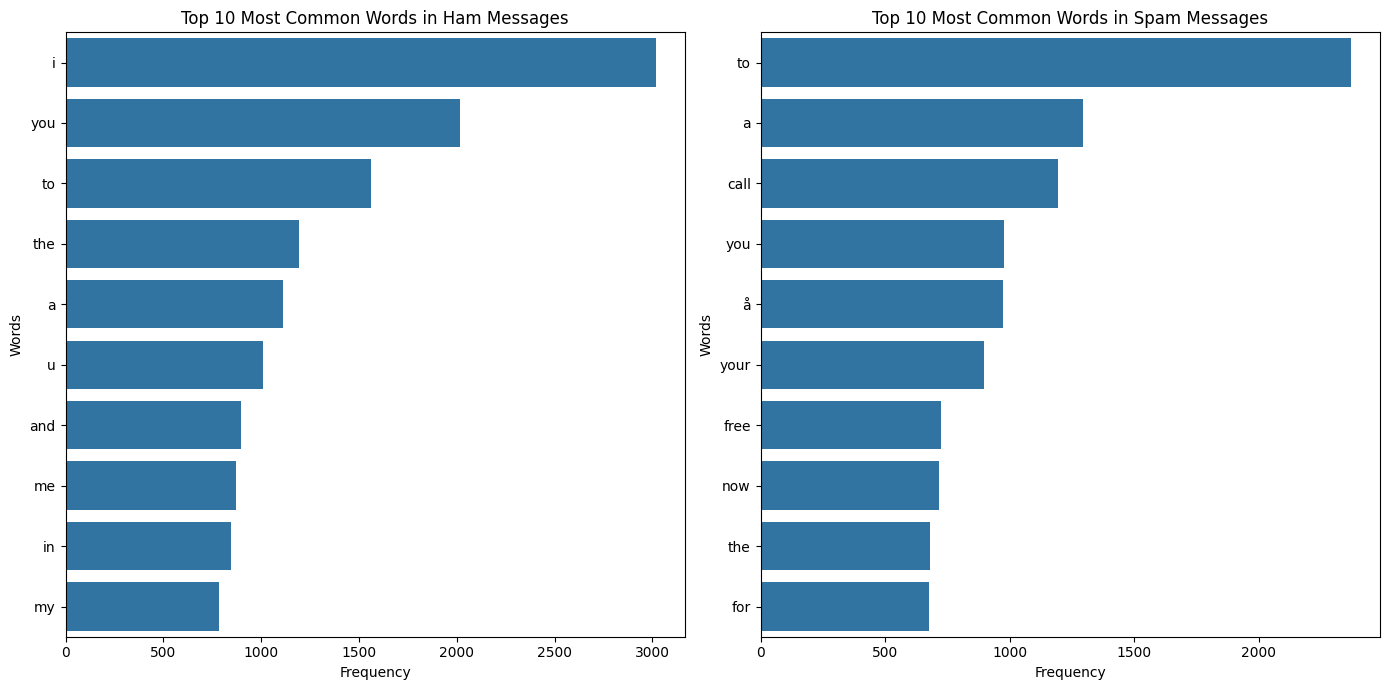

([('i', 3016),
  ('you', 2017),
  ('to', 1564),
  ('the', 1195),
  ('a', 1113),
  ('u', 1012),
  ('and', 896),
  ('me', 869),
  ('in', 846),
  ('my', 783)],
 [('to', 2369),
  ('a', 1293),
  ('call', 1195),
  ('you', 977),
  ('å', 973),
  ('your', 897),
  ('free', 725),
  ('now', 717),
  ('the', 680),
  ('for', 677)])

In [5]:
# Additional Exploratory Data Analysis (EDA) to uncover more insights

# 1. Top 10 most common words in spam and ham messages
from collections import Counter
import re

# Function to clean and split text into words
def clean_and_split(text):
    words = re.findall(r'\w+', text.lower())
    return words

# Combine all messages into a single string per category
ham_words = clean_and_split(" ".join(resampled_data[resampled_data['Label'] == 'ham']['Message']))
spam_words = clean_and_split(" ".join(resampled_data[resampled_data['Label'] == 'spam']['Message']))

# Count the words and get the most common ones
ham_word_counts = Counter(ham_words)
spam_word_counts = Counter(spam_words)

most_common_ham_words = ham_word_counts.most_common(10)
most_common_spam_words = spam_word_counts.most_common(10)

# 2. Word counts in ham vs spam messages
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=[word[1] for word in most_common_ham_words], y=[word[0] for word in most_common_ham_words])
plt.title('Top 10 Most Common Words in Ham Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.subplot(1, 2, 2)
sns.barplot(x=[word[1] for word in most_common_spam_words], y=[word[0] for word in most_common_spam_words])
plt.title('Top 10 Most Common Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

most_common_ham_words, most_common_spam_words

In [7]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 187.9 kB/s eta 0:00:04
   --- ----------------------------------- 61.4/626.3 kB 297.7 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/626.3 kB 516.7 kB/s eta 0:00:01
   ---------------------- ----------------- 358.4/626.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.1 MB/s eta 0:00:01
   ----------------------

In [8]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis function to the messages
resampled_data['Sentiment Polarity'] = resampled_data['Message'].apply(calculate_sentiment)

# Descriptive statistics of sentiment polarity for the entire dataset
sentiment_overall_stats = resampled_data['Sentiment Polarity'].describe()

# Descriptive statistics of sentiment polarity by label
sentiment_by_label_stats = resampled_data.groupby('Label')['Sentiment Polarity'].describe()

sentiment_overall_stats, sentiment_by_label_stats

(count    7500.000000
 mean        0.147580
 std         0.285902
 min        -1.000000
 25%         0.000000
 50%         0.000000
 75%         0.342675
 max         1.000000
 Name: Sentiment Polarity, dtype: float64,
         count      mean       std  min  25%   50%  75%  max
 Label                                                      
 ham    5000.0  0.125031  0.290763 -1.0  0.0  0.00  0.3  1.0
 spam   2500.0  0.192679  0.270394 -0.8  0.0  0.15  0.4  1.0)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the dataset into training and testing sets
X = resampled_data['Message']
y = resampled_data['Label'].map({'ham': 0, 'spam': 1})  # Converting labels to numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Initializing classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
rf_classifier = RandomForestClassifier(n_estimators=100)

# Training and evaluating models
models = {
    'Naive Bayes': nb_classifier,
    'Logistic Regression': lr_classifier,
    'Random Forest': rf_classifier
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results

{'Naive Bayes': {'Accuracy': 0.9806666666666667,
  'Precision': 0.9808510638297873,
  'Recall': 0.9584199584199584,
  'F1 Score': 0.9695057833859095},
 'Logistic Regression': {'Accuracy': 0.9793333333333333,
  'Precision': 0.993421052631579,
  'Recall': 0.9417879417879418,
  'F1 Score': 0.9669156883671292},
 'Random Forest': {'Accuracy': 0.998,
  'Precision': 1.0,
  'Recall': 0.9937629937629938,
  'F1 Score': 0.9968717413972888}}